In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


##  Dataset Description

The dataset contains customer information and service usage metrics for a telecommunications company.  
The features are described as follows:

###  Features

- **customerID** – Unique identifier for each customer.  
- **gender** – Customer's gender *(Male/Female)*.  
- **SeniorCitizen** – Indicates whether the customer is a senior citizen *(1 = Yes, 0 = No)*.  
- **Partner** – Indicates if the customer has a partner *(Yes/No)*.  
- **Dependents** – Indicates if the customer has dependents *(Yes/No)*.  
- **tenure** – Number of months the customer has been with the company.  
- **PhoneService** – Whether the customer subscribes to phone service *(Yes/No)*.  
- **MultipleLines** – Indicates if the customer has multiple phone lines *(Yes/No/No phone service)*.  
- **InternetService** – Type of internet service subscribed *(DSL, Fiber optic, No)*.  
- **OnlineSecurity** – Indicates whether the customer has online security add-on *(Yes/No/No internet service)*.  
- **OnlineBackup** – Indicates if the customer uses online backup service *(Yes/No/No internet service)*.  
- **DeviceProtection** – Indicates if the customer has device protection *(Yes/No/No internet service)*.  
- **TechSupport** – Indicates if the customer has tech support subscription *(Yes/No/No internet service)*.  
- **StreamingTV** – Indicates if the customer streams TV *(Yes/No/No internet service)*.  
- **StreamingMovies** – Indicates if the customer streams movies *(Yes/No/No internet service)*.  
- **Contract** – Type of contract *(Month-to-month, One year, Two year)*.  
- **PaperlessBilling** – Whether the customer uses paperless billing *(Yes/No)*.  
- **PaymentMethod** – Payment method used by the customer *(Electronic check, Mailed check, Bank transfer, Credit card)*.  
- **MonthlyCharges** – The amount charged to the customer monthly.  
- **TotalCharges** – Total amount charged to the customer over the tenure.  
- **Churn** – Indicates whether the customer has canceled the service *(Yes/No)*.  


## ENVIRONMENT SETUP

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5797,1169-WCVAK,Male,0,Yes,No,19,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),88.80,1672.35,No
4807,9695-IDRZR,Female,0,No,Yes,34,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.15,3946.9,No
1579,9391-EOYLI,Male,1,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.45,950.2,Yes
3050,0876-WDUUZ,Female,0,No,No,5,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),85.40,425.9,Yes
4238,5016-LIPDW,Male,0,Yes,Yes,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,1061.6,No


In [6]:
#lets view the columns in the dataset

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#lets view the number of rows and columns in the dataset
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Handling missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# As we can see above that the values in column "TotalCharges" are object(strings) and not numeric. So lets convert it to numeric first up 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  #If you find any value that cannot be converted to a number (e.g., blank,then replace it with NaN space, or text)
print("Missing values after converting TotalCharges:")
print(df.isnull().sum())

Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
#Now lets drop the columns with NaN value in TotalCharges column:

df.dropna(inplace=True)
print("Missing values after dropping rows:")
print(df.isnull().sum())

Missing values after dropping rows:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
#lets view the number of rows and columns in the dataset now:
df.shape

(7032, 21)

## Exploratory Data Analysis:

### Countplot:

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


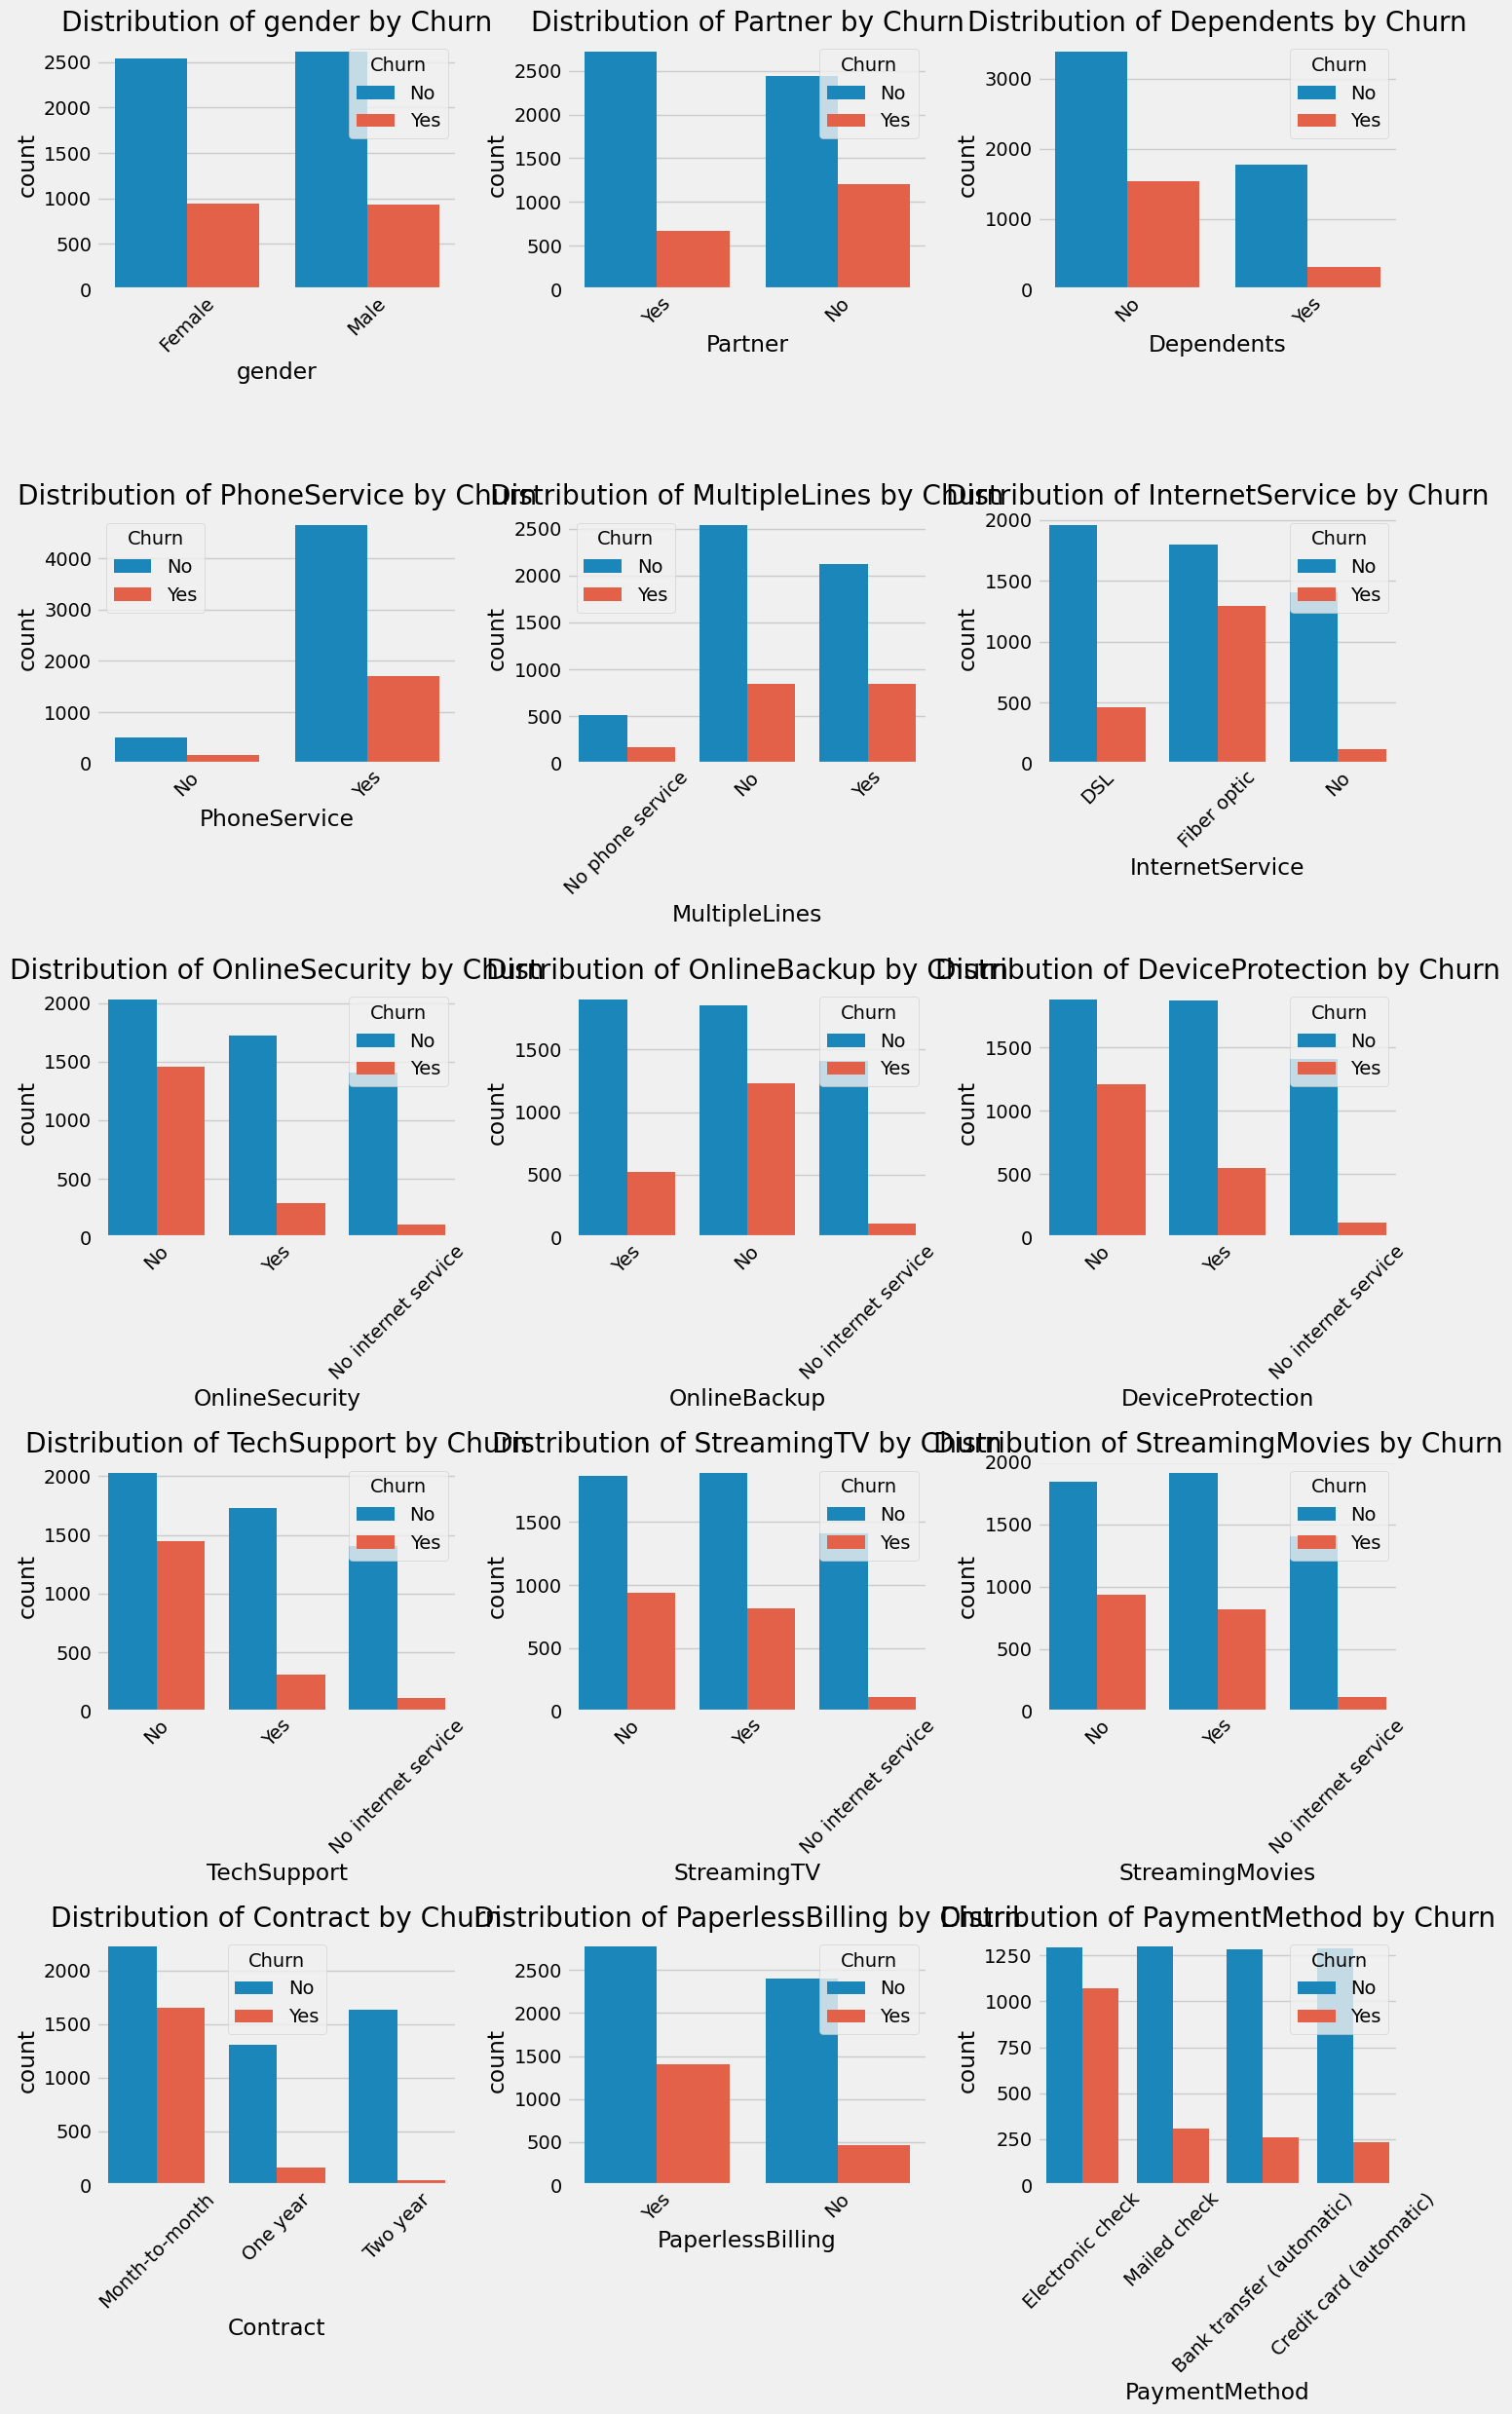

In [14]:
# Lets create a list of categorical columns excluding 'customerID' and 'Churn'
categorical_cols=df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
print(categorical_cols)

#Set up subplot layout
n_cols=3
n_rows=(len(categorical_cols)+n_cols-1)//n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
# print(axes)
axes=axes.flatten() #converts the 2D array of Axes objects into a 1D list so we can easily loop through

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df,x=col,hue="Churn",ax=axes[i])  #ax=axes[i] gives the axes indexing to draw the plot on
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', rotation=45)  #rotates labels on x-axis by 45 degrees.
    # axes[i].legend(title='Churn')
plt.tight_layout()   #tight_layout() ensures plots don’t overlap or get squished.
plt.show()

### Boxplot:

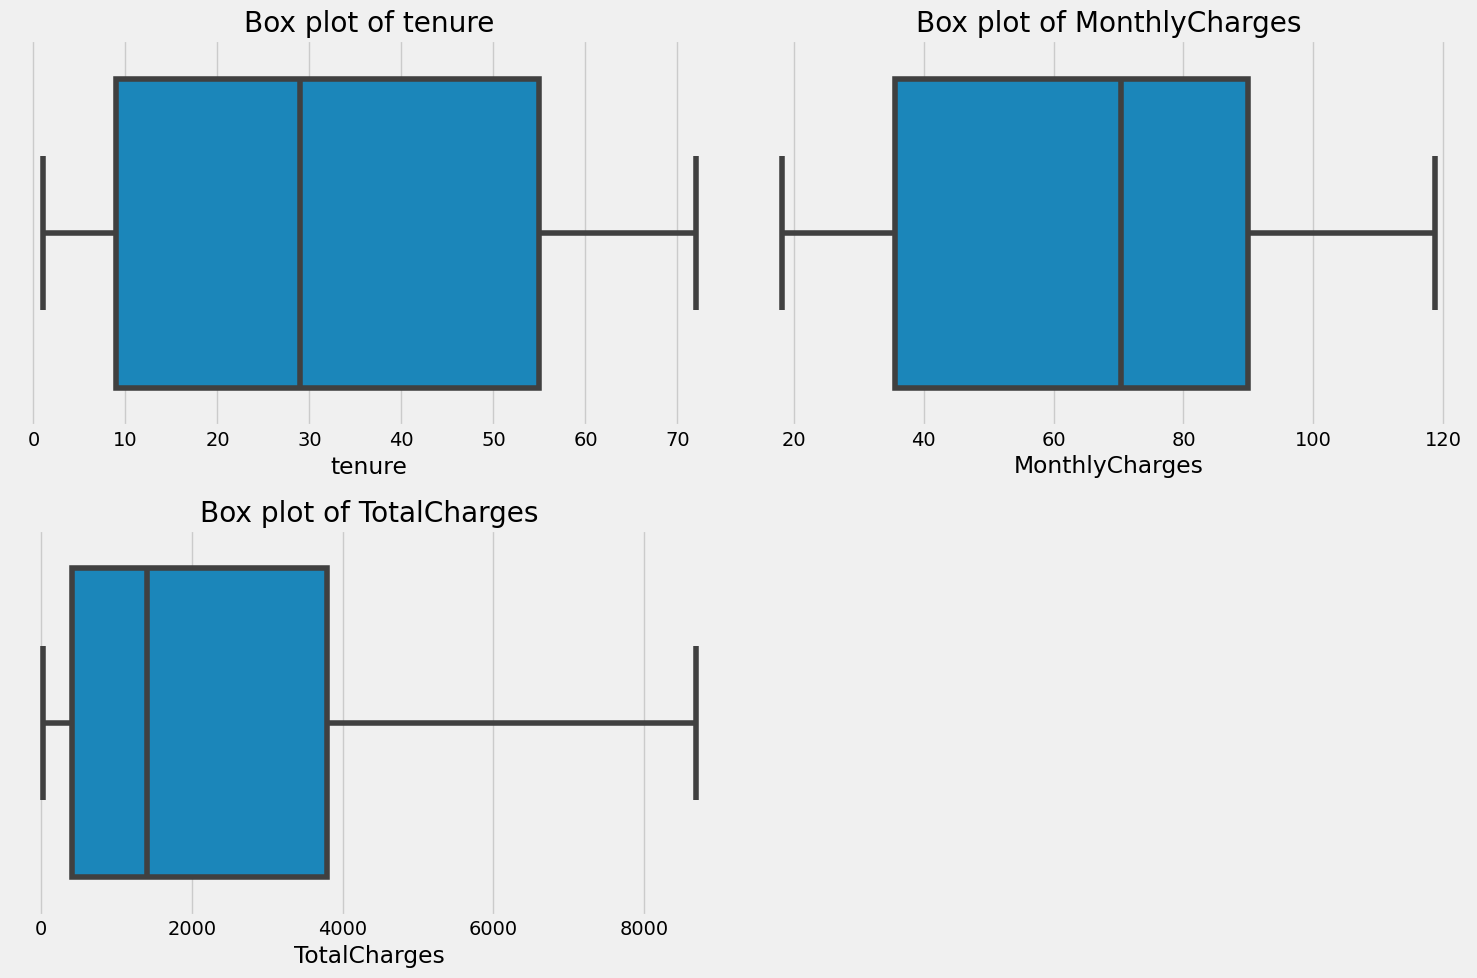

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

##### Based on these box plots, there don't seem to be any extreme outliers that would necessarily require removal

### Heatmap

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_numeric
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.015683,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.219874,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.102411,-0.199484
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
Churn_numeric,0.150541,-0.354049,0.192858,-0.199484,0.150541,1.000000


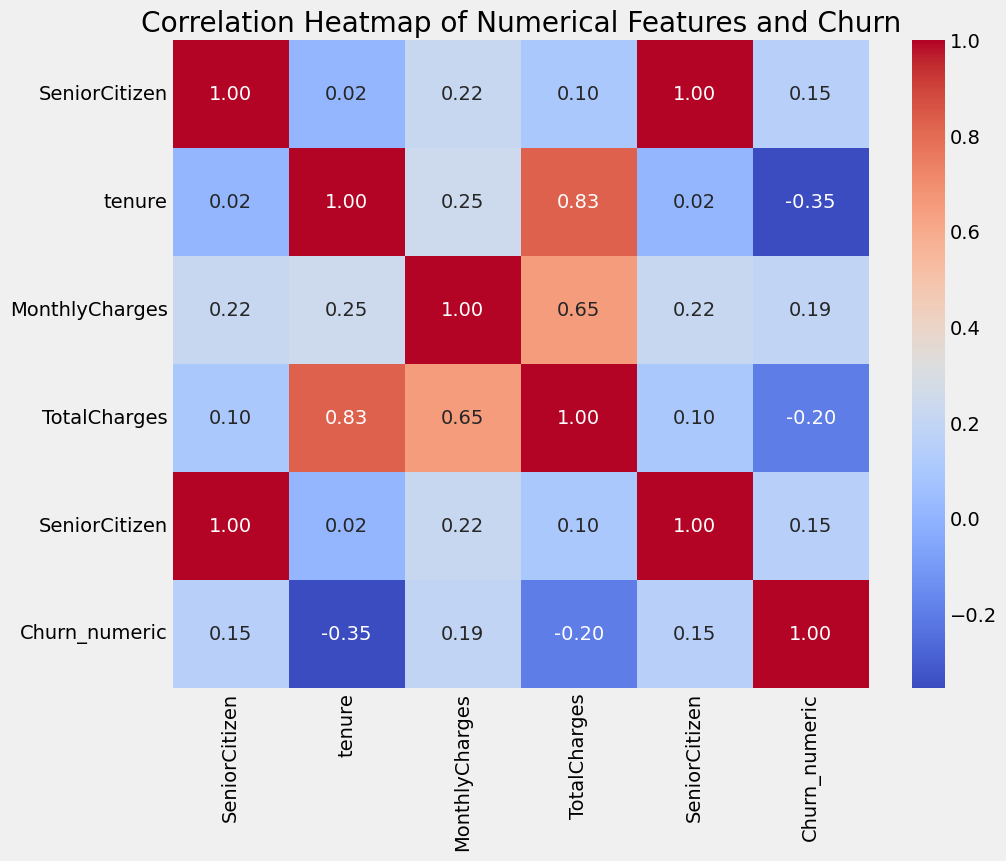

In [16]:
#Lets first create a list of numeric columns
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
print(numerical_cols)

# Convert 'Churn' column to numerical (0 for 'No', 1 for 'Yes')
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns and the new 'Churn_numeric' column
numerical_data = df[numerical_cols + ['Churn_numeric']]

# Calculate the correlation matrix across the numerical columns
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
display(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

### Histplot

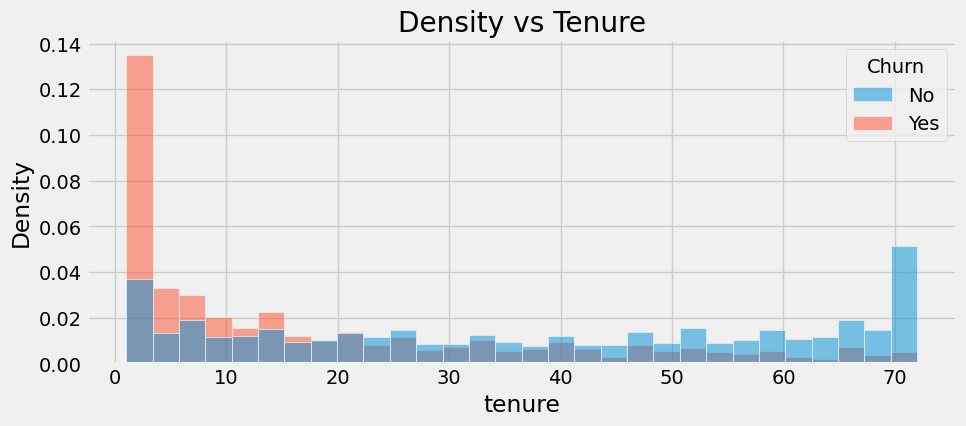

In [17]:
#Tenure vs Churn:

plt.figure(figsize=(10,4))
sns.histplot(data=df,x='tenure',bins=30, hue="Churn", stat="density",common_norm=False) 
#the hue is used to add color to the yes or no in the churn variable
#stat="density" provides y label
#common_norm=False does the normalization

plt.title("Density vs Tenure")
plt.show()

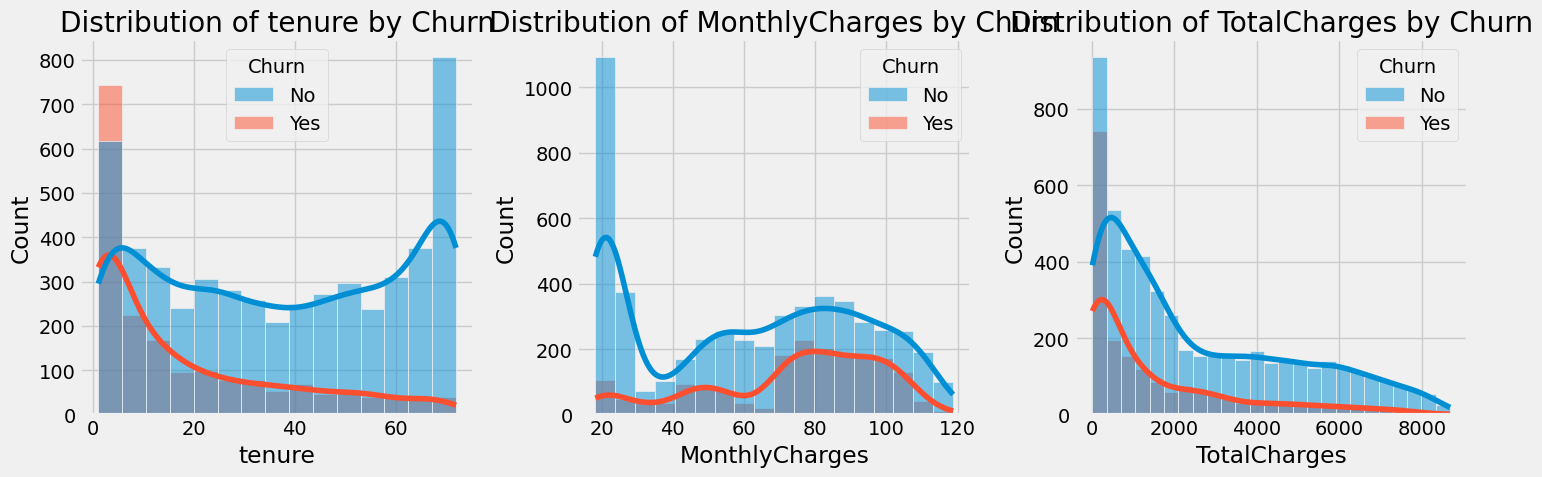

In [18]:
n_cols = 3
n_rows = (len(['tenure', 'MonthlyCharges', 'TotalCharges']) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    # axes[i].legend(title='Churn')


plt.tight_layout()
plt.show()

##### The heatmap shows that tenure and total charges have a strong negative correlation with churn, meaning customers with longer tenure or higher total charges are less likely to leave. The churn rate is highest among customers with month-to-month contracts.

##### Correlation shows that Tenure and TotalCharges are strongly correlated. Correlations with Churn are low, but feature interactions may matter.

## Label Encoder

In [19]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,No,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,No,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,Yes,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,No,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,1,1,3,84.80,1990.50,No,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,0,2,2,1,1,1,103.20,7362.90,No,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,1,2,29.60,346.45,No,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,1,3,74.40,306.60,Yes,1


### Train Test Split

In [20]:
# Define features (X) and target (y)
# We drop 'customerID' as it's an identifier and 'Churn' and 'Churn_numeric' as they are target variables
X = df.drop(['customerID', 'Churn', 'Churn_numeric'], axis=1)
y = df['Churn_numeric']

# Identify numerical columns for scaling (excluding the encoded categorical columns)
# We should only scale the truly numerical columns: 'tenure', 'MonthlyCharges', 'TotalCharges'
# 'SeniorCitizen' is binary and doesn't need scaling in this context.
numerical_cols_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])
print(X[numerical_cols_for_scaling])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

        tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7038 -0.343137        0.664868     -0.129180
7039  1.612573        1.276493      2.241056
7040 -0.872808       -1.170004     -0.854514
7041 -1.158016        0.319168     -0.872095
7042  1.368109        1.357932      2.012344

[7032 rows x 3 columns]
X_train shape: (4922, 19)
X_test shape: (2110, 19)
y_train shape: (4922,)
y_test shape: (2110,)


## Model

In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import time

def extended_grid_search(X_train, y_train, X_test, y_test):
    models_params = {
        'LogisticRegression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))
            ]),
            'params': {'clf__C': [0.01, 0.1, 1, 10],
                       'clf__solver': ['lbfgs', 'liblinear']}
        },
        'SVM': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', SVC())
            ]),
            'params': {'clf__C': [0.1, 1, 10],
                       'clf__kernel': ['linear', 'rbf'],
                       'clf__gamma': ['scale', 'auto']}
        },
        'KNeighbors': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', KNeighborsClassifier())
            ]),
            'params': {'clf__n_neighbors': [3, 5, 7],
                       'clf__weights': ['uniform', 'distance']}
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth': [None, 5, 10],
                       'min_samples_split': [2, 5, 10]}
        },
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {'n_estimators': [100, 200],
                       'max_depth': [None, 5, 10]}
        },
        'ExtraTrees': {
            'model': ExtraTreesClassifier(),
            'params': {'n_estimators': [100, 200],
                       'max_depth': [None, 5, 10]}
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(),
            'params': {'n_estimators': [100, 200],
                       'learning_rate': [0.05, 0.1],
                       'max_depth': [3, 5]}
        },
        'AdaBoost': {
            'model': AdaBoostClassifier(),
            'params': {'n_estimators': [50, 100, 200],
                       'learning_rate': [0.05, 0.1, 1.0]}
        },
        'NaiveBayes': {
            'model': GaussianNB(),
            'params': {}
        },
        'LDA': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', LinearDiscriminantAnalysis())
            ]),
            'params': {}
        },
        'QDA': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('clf', QuadraticDiscriminantAnalysis())
            ]),
            'params': {}
        },
        'XGBoost': {
            'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
            'params': {'n_estimators': [100, 200],
                       'learning_rate': [0.05, 0.1],
                       'max_depth': [3, 5]}  # ✅ پرانتز بسته شد
        },
        'LightGBM': {
            'model': lgb.LGBMClassifier(verbose=-1),
            'params': {'n_estimators': [100, 200],
                       'learning_rate': [0.05, 0.1],
                       'max_depth': [3, 5, 10, 15]}
        },
        'CatBoost': {
            'model': CatBoostClassifier(verbose=0),
            'params': {'iterations': [100, 200],
                       'depth': [2,3, 5, 7,10,13],
                       'learning_rate': [0.05, 0.1]}
        }
    }

    results = []
    best_models = {}
    total_models = len(models_params)

    for i, (name, mp) in enumerate(models_params.items(), 1):
        print(f"[{i}/{total_models}] Training {name}...")
        start = time.time()

        gs = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        duration = time.time() - start

        print(f"[{i}/{total_models}] {name} finished in {duration:.2f}s — Accuracy: {acc:.4f}")

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Best Params': gs.best_params_,
            'Train Time (s)': round(duration, 2)
        })

        best_models[name] = {
            'best_model': gs.best_estimator_,
            'test_accuracy': acc,
            'y_pred': y_pred
        }

    results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

    best_name = results_df.iloc[0]['Model']
    best_info = best_models[best_name]

    print(f"\nBest Model: {best_name}")
    print(f"Accuracy: {best_info['test_accuracy']:.4f}")
    print(f"Best Params: {results_df.iloc[0]['Best Params']}")

    return best_name, best_info['best_model'], best_info['test_accuracy'], best_info['y_pred']
    

In [22]:
best_name, best_model, best_acc ,best_y_pred= extended_grid_search(X_train, y_train, X_test, y_test)

print(f"Best Model: {best_name}")
print(f"Accuracy: {best_acc:.4f}")

[1/14] Training LogisticRegression...
[1/14] LogisticRegression finished in 2.32s — Accuracy: 0.8062
[2/14] Training SVM...
[2/14] SVM finished in 23.89s — Accuracy: 0.7991
[3/14] Training KNeighbors...
[3/14] KNeighbors finished in 0.91s — Accuracy: 0.7611
[4/14] Training DecisionTree...
[4/14] DecisionTree finished in 0.43s — Accuracy: 0.7844
[5/14] Training RandomForest...
[5/14] RandomForest finished in 8.93s — Accuracy: 0.8095
[6/14] Training ExtraTrees...
[6/14] ExtraTrees finished in 6.95s — Accuracy: 0.8123
[7/14] Training GradientBoosting...
[7/14] GradientBoosting finished in 20.33s — Accuracy: 0.8109
[8/14] Training AdaBoost...
[8/14] AdaBoost finished in 10.64s — Accuracy: 0.8133
[9/14] Training NaiveBayes...
[9/14] NaiveBayes finished in 0.06s — Accuracy: 0.7640
[10/14] Training LDA...
[10/14] LDA finished in 0.09s — Accuracy: 0.8005
[11/14] Training QDA...
[11/14] QDA finished in 0.14s — Accuracy: 0.7621
[12/14] Training XGBoost...
[12/14] XGBoost finished in 2.45s — Accu

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

F1 Score for CatBoost: 0.6145

Confusion Matrix:
[[1420  129]
 [ 255  306]]


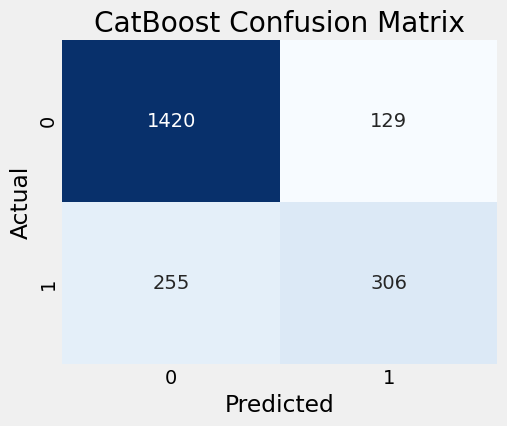


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1549
           1       0.70      0.55      0.61       561

    accuracy                           0.82      2110
   macro avg       0.78      0.73      0.75      2110
weighted avg       0.81      0.82      0.81      2110



In [24]:
f1 = f1_score(y_test, best_y_pred)
print(f"F1 Score for {best_name}: {f1:.4f}\n")


cm = confusion_matrix(y_test, best_y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_name} Confusion Matrix")
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, best_y_pred))

In [25]:
best_acc

0.8180094786729858